# Desafio Analista

Objetivo: Analisar um banco de dados de um marketplace e extrair informações que possam ser relavantes ao negócio.

O banco de dados possui cinco tabelas, que são:

*   **account**: dados sobre vendedores.
*   **payments**: dados sobre os pagamentos realizados
*   **customers**: consumidores finais desses vendedores
*   **account_balance**: dados dos saldos das contas dos vendedores
*   **bank_transfers**: dados referentes aos saques dos vendedores




---



# Importando Bibliotecas

Vamos importar algumas bibliotecas que utilizaremos durante nossa análise:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


As tabelas do banco de dados facilitadora_de_pagamentos, foram extraídas no formato .csv 


In [3]:
accounts = '/content/accounts.csv'
payments = '/content/payments.csv'
customers = '/content/customers.csv'
account_balance = '/content/account_balance.csv'
bank_transfers = '/content/bank_transfers.csv'

Iremos ler e armazenar cada tabela nas seguintes variáveis abaixo:

In [4]:
dados_accounts = pd.read_csv(accounts)
dados_payments = pd.read_csv(payments)
dados_customers = pd.read_csv(customers)
dados_account_balance = pd.read_csv(account_balance)
dados_bank_transfers = pd.read_csv(bank_transfers)

Vamos checar quantos vendedores estão presentes na tabela accouts:

In [5]:
dados_accounts

,_id,name,created_at,birthdate,email,state
0,5f50e19aaef534168542f82c,Ella Fuentes,2018-04-12 04:11:00 UTC,1995-04-01,ella2018fuentes@gmail.com,AC/BR
1,5f50e19ad05c511af0a89fff,Judy Preston,2018-03-07 04:43:00 UTC,1987-01-22,jp2018_new@gmail.com,MT/BR
2,5f50e19a836e1cd15acb2fd7,Aileen Rasmussen,2018-11-04 03:15:00 UTC,1986-10-21,aileen_rasmussen@hotmail.com,RS/BR
3,5f50e19a413ccfef1bdd2143,Katrina Foley,2017-07-20 06:00:00 UTC,1991-07-22,katrinafoley91@gmail.com,SC/BR
4,5f50e19afb1971f2b473a181,Amelia Reilly,2019-07-31 05:59:00 UTC,2004-03-26,sophia_reilly_1967@gmail.com,SC/BR
5,5f50e19ab61a843cbaaf0d5a,Harmon Small,2019-01-21 09:21:00 UTC,1995-05-01,smallharmon@hotmail.com,SC/BR
6,5f50e19afd9e92e2ab3a0487,Nona Zamora,2019-03-25 02:34:00 UTC,1991-08-28,9zamora@outlook.com,SC/BR
7,5f50e19a60ba4ea5c03c8c50,Gary Bonner,2017-04-10 08:02:00 UTC,1999-10-21,gary_1999_b@gmail.com,SP/BR
8,5f50e19a411bd6dd38f5a9d8,Farmer Wynn,2019-02-28 02:16:00 UTC,1943-07-29,ahsdjaha@10minute.com,SP/BR
9,5f50e19a299538c596304d31,Gibbs Joyce,2019-05-18 04:32:00 UTC,1988-12-11,gibbsjoyce_joselin@hotmail.com,SP/BR


10 vendedores fazem parte desse marketplace. 
Vamos verificar de qual estado esses vendedores são:

(Olhando a tabela, por ser pequena, é fácil verificar isso. Porém se tivéssemos mais vendedores, seria difícil. Por questão de organização, vamos fazer uma contagem para cada estado de cada vendedor),

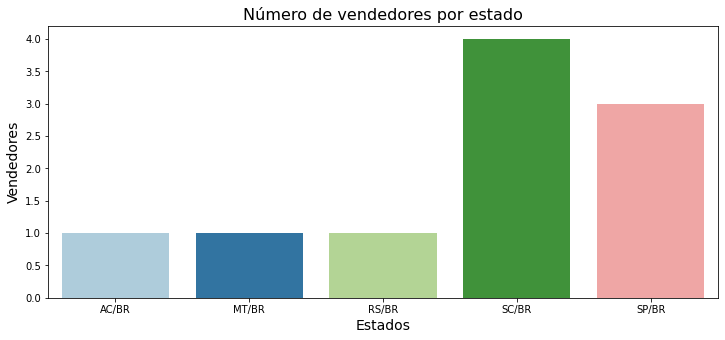

In [6]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'state', data=dados_accounts, palette='Paired')
ax.set_title('Número de vendedores por estado', fontsize=16)
ax.set_xlabel('Estados', fontsize=14 )
ax.set_ylabel('Vendedores', fontsize=14)


plt.show()

Como podemos ver, a maior parte dos vendedores é da região Sul do país, do estado de Santa Catarina.


Vamos analisar agora a tabela customers e checar a quantidade e os 4 primeiros  clientes da tabela:

In [7]:
tamanho_clientes = dados_customers.shape
print('Número total de clientes:', tamanho_clientes[0])
dados_customers.head(4)

Número total de clientes: 230


,_id,card_hold_name,name,birth_date,state,phone
0,5f50dd2029c6ea7c92c985c1,Joann Simpson,Joann Simpson,1995-10-14,AC/BR,68988813295
1,5f50dd203211f2d1443d8f86,Cathryn Shelton,Cathryn Shelton,1991-06-03,AC/BR,68981367703
2,5f50dd20b4f2f9b3d726efb2,Gregory Santos,Gregory Santos,2002-04-24,AC/BR,68985394411
3,5f50dd205130b01513d28083,Tameka Levine,Tameka Levine,1963-06-18,AC/BR,47985268507


Ao todo, há 230 clientes. Podemos ver que os 4 primeiros são do estado do Acre. 
Vamos ver de quais estados esses clientes pertencem:

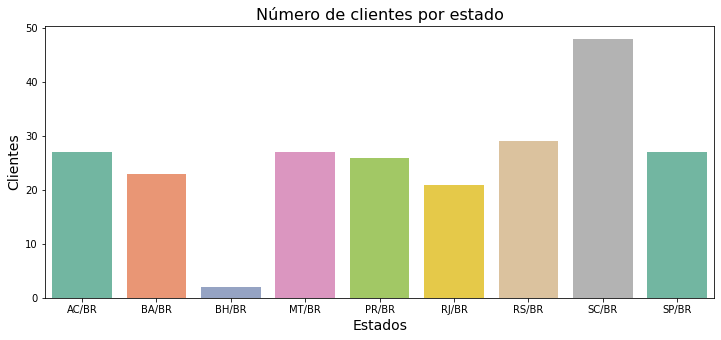

In [8]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='state', data=dados_customers, palette='Set2')
ax.set_title('Número de clientes por estado', fontsize=16)
ax.set_xlabel('Estados', fontsize=14 )
ax.set_ylabel('Clientes', fontsize=14)
plt.show()

A maior parte dos vendedores é do estado de Santa Catarina, mas há vendedores de diversos outros estados.

Vamos verificar a tabela payments agora, que consiste no pagamento realizado aos vendedores:

In [9]:
dados_payments

,_id,account_id,paid_at,amount_paid,marketplace_fee,ip_location,customer_id
0,5f50dd204d48a59e845519fe,5f50e19a299538c596304d31,2020-02-07 09:55:00 UTC,2899.77,29.00,SP/BR,5f50dd201df56aef0d42f1e6
1,5f50dd201c9cf367e64803f8,5f50e19a299538c596304d31,2020-08-23 06:18:00 UTC,1676.89,16.77,SP/BR,5f50dd20daf722fb0fc25a5d
2,5f50dd204f7299059f441c58,5f50e19a299538c596304d31,2020-03-28 12:17:00 UTC,838.45,8.38,SP/BR,5f50dd20a96a43441cdfdaa0
3,5f50dd20a18128c90922d868,5f50e19a299538c596304d31,2020-09-02 12:13:00 UTC,887.39,8.87,SP/BR,5f50dd20981542a0cd0495fd
4,5f50dd205f44f510e938126c,5f50e19a299538c596304d31,2020-06-29 11:50:00 UTC,993.56,9.94,SP/BR,5f50dd201d455546b2fd0572
...,...,...,...,...,...,...,...
225,5f50dd201e18bad3e16f5d3e,5f50e19afd9e92e2ab3a0487,2020-08-16 06:09:00 UTC,790.27,31.61,SC/BR,5f50dd200184054db308f6b2
226,5f50dd201a773b40d26f8acd,5f50e19afd9e92e2ab3a0487,2020-08-09 04:50:00 UTC,210.31,8.41,SC/BR,5f50dd203a5b6bcaf0e7aea8
227,5f50dd208a6c9e813294c3b5,5f50e19afd9e92e2ab3a0487,2020-01-31 09:49:00 UTC,792.46,31.70,SC/BR,5f50dd20eb1fd423605960b3
228,5f50dd20c53c06e62efca58d,5f50e19afd9e92e2ab3a0487,2020-07-14 01:09:00 UTC,630.77,25.23,SC/BR,5f50dd20cc033cc951e38652


Com essa tabela, podemos extrair informações bem importantes, tais como:
- Qual o valor total em vendas?
- Qual foi o vendedor que mais vendeu produtos? De qual estado ele pertence?
- Esse que mais vendeu produtos, necessariamente teve o maior lucro?
- Qual vendedor teve o maior lucro?
- Qual o valor total da taxa de venda?




Primeiramente, vamos mudar o id dos vendedores para facilitar a manipulação e nossas análises. 

Sabemos que há 10 vendedores nesse marketplace, então, vamos numerá-los de 1 a 10:


In [10]:
dados_payments['account_id'].value_counts()



5f50e19a60ba4ea5c03c8c50    31
5f50e19a836e1cd15acb2fd7    27
5f50e19a413ccfef1bdd2143    26
5f50e19aaef534168542f82c    26
5f50e19a299538c596304d31    22
5f50e19a411bd6dd38f5a9d8    22
5f50e19afb1971f2b473a181    21
5f50e19ad05c511af0a89fff    20
5f50e19ab61a843cbaaf0d5a    18
5f50e19afd9e92e2ab3a0487    17
Name: account_id, dtype: int64

Vamos criar um loop para ir adicionando uma numeração de acordo com os dois últimos dígitos do id do vendedor:

In [11]:
id_vendedor = []
for vendedor in dados_payments['account_id']:
  if vendedor.endswith('50'):
    id_vendedor.append(1)
  elif vendedor.endswith('d7'):
    id_vendedor.append(2)
  elif vendedor.endswith('43'):
    id_vendedor.append(3)
  elif vendedor.endswith('2c'):
    id_vendedor.append(4)
  elif vendedor.endswith('d8'):
    id_vendedor.append(5)
  elif vendedor.endswith('31'):
    id_vendedor.append(6)
  elif vendedor.endswith('81'):
    id_vendedor.append(7)
  elif vendedor.endswith('ff'):
    id_vendedor.append(8)
  elif vendedor.endswith('5a'):
    id_vendedor.append(9)
  elif vendedor.endswith('87'):
    id_vendedor.append(10)

Vamos agora adicionar mais uma coluna em nossa tabela associando os novos valores aos id's dos vendedores:

In [12]:
dados_payments.insert(2, column='numero_vendedor', value=id_vendedor)

Vamos verificar se a inserção foi realizada:

In [13]:
dados_payments.head()

,_id,account_id,numero_vendedor,paid_at,amount_paid,marketplace_fee,ip_location,customer_id
0,5f50dd204d48a59e845519fe,5f50e19a299538c596304d31,6,2020-02-07 09:55:00 UTC,2899.77,29.00,SP/BR,5f50dd201df56aef0d42f1e6
1,5f50dd201c9cf367e64803f8,5f50e19a299538c596304d31,6,2020-08-23 06:18:00 UTC,1676.89,16.77,SP/BR,5f50dd20daf722fb0fc25a5d
2,5f50dd204f7299059f441c58,5f50e19a299538c596304d31,6,2020-03-28 12:17:00 UTC,838.45,8.38,SP/BR,5f50dd20a96a43441cdfdaa0
3,5f50dd20a18128c90922d868,5f50e19a299538c596304d31,6,2020-09-02 12:13:00 UTC,887.39,8.87,SP/BR,5f50dd20981542a0cd0495fd
4,5f50dd205f44f510e938126c,5f50e19a299538c596304d31,6,2020-06-29 11:50:00 UTC,993.56,9.94,SP/BR,5f50dd201d455546b2fd0572


Legal! Inserção realizada! Vamos às análises:

Vamos verificar o valor total em vendas:


In [14]:
total_payment = dados_payments['amount_paid'].sum()
print('Valor total em vendas: R$', total_payment)

Valor total em vendas: R$ 123474.75999999998


Vamos agora distribuir esse valor entre os vendedores e saber qual foi o vendedor que mais vendeu:

In [15]:
account_id = dados_payments.groupby('numero_vendedor')

In [16]:
numero_venda_total_por_vendedor = account_id.agg('count').sort_values('amount_paid', ascending = False)
numero_venda_total_por_vendedor


,_id,account_id,paid_at,amount_paid,marketplace_fee,ip_location,customer_id
numero_vendedor,,,,,,,
1,31,31,31,31,31,31,31
2,27,27,27,27,27,27,27
3,26,26,26,26,26,26,26
4,26,26,26,26,26,26,26
5,22,22,22,22,22,22,22
6,22,22,22,22,22,22,22
7,21,21,21,21,21,21,21
8,20,20,20,20,20,20,20
9,18,18,18,18,18,18,18


Pela tabela acima, vemos que o vendedor de número 1 possui mais vendas. Ao todo, ele vendeu 31 vezes. 
Mas será que o fato de ter vendido mais produtos, significa que ele vendeu mais em reais?
Vamos conferir:

In [17]:
venda_total_por_vendedor = account_id.agg('sum').sort_values('amount_paid', ascending = False)
venda_total_por_vendedor


,amount_paid,marketplace_fee
numero_vendedor,,
6,26939.73,269.39
4,16466.33,98.80
1,14002.42,980.18
3,13422.84,671.14
8,11737.08,117.36
5,11028.45,110.27
7,9495.41,94.94
10,8662.87,346.53
9,8616.13,1292.43


Vemos que o vendedor de número 6 foi quem vendeu mais, embora tenha um número menor de vendas(22 vendas). Provavelmente, ele vendeu um produto que fosse mais caro, compensando assim a diferença de 22 vendas para 31 vendas do número 1.
Vamos ver a distribuição graficamente:

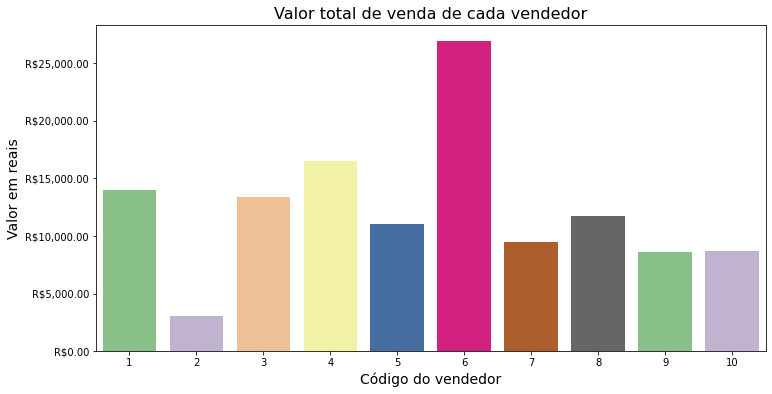

In [18]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = venda_total_por_vendedor.index, y='amount_paid', data=venda_total_por_vendedor, palette='Accent')
ax.set_title('Valor total de venda de cada vendedor', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_xlabel('Código do vendedor', fontsize=14 )
ax.set_ylabel('Valor em reais', fontsize=14)
plt.show()

Claramente, vemos que o vendedor de número 6 possui um lucro bem superior que os demais, acima de R$ 25.000,00 reais

Vamos ver abaixo a distribuição  dos valores de vendas totais num boxplot:

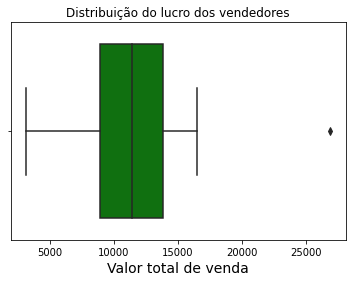

In [19]:
ax = sns.boxplot(data = venda_total_por_vendedor, x='amount_paid', color = 'green' )
ax.set_xlabel('Valor total de venda', fontsize=14 )
ax.set_title('Distribuição do lucro dos vendedores')
plt.show()

Podemos ver que o lucro total concentra-se entre mais ou menos 8.000 a 13.000.
Há um valor fora dessa distribuição, um outlier. Outlier, pois dentro dessa distribuição o lucro foi bem mais alto comparado aos demais vendedores.

Vamos ver qual foi o valor médio e o mediano de lucro:

In [20]:
mediana = venda_total_por_vendedor['amount_paid'].median()
media = venda_total_por_vendedor['amount_paid'].mean()
print('Valor médio do lucro total:', media)
print('Valor mediano do lucro total:', mediana)

Valor médio do lucro total: 12347.475999999999
Valor mediano do lucro total: 11382.765


Vamos verificar a diferença entre o vendedor 1 e o vendedor 6.

O vendedor 1 teve um lucro menor, porém vendeu mais produtos e o vendedor 6 teve um lucro maior porém vendeu menos produtos.

Vamos analisar:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


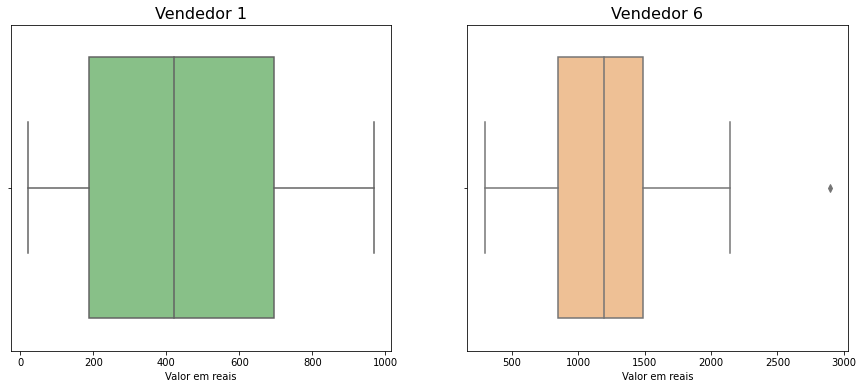

In [21]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(1,2,1)
vendedor_1 = dados_payments[dados_payments['numero_vendedor']== 1]
ax = sns.boxplot(vendedor_1['amount_paid'], color='#7fc97f')
ax.set_title('Vendedor 1', fontsize=16)
ax.set_xlabel('Valor em reais')

fig.add_subplot(1,2,2)
vendedor_6 = dados_payments[dados_payments['numero_vendedor']== 6]
ax1 = sns.boxplot(vendedor_6['amount_paid'], color='#fdc086')
ax1.set_title('Vendedor 6', fontsize=16)
ax1.set_xlabel('Valor em reais')
plt.show()


Vemos acima a distribuição de venda de cada um dois vendedores.

Comparando as duas distribuições, conseguimos provar nossa hipóstese e  entender porque o vendedor 2 apesar de vender menos, teve um lucro maior. 
Sua distribuição está situada entre 800,00 a 1.500,00 reais, ou seja, essa é a faixa de valores de produtos mais abundante na distribuição do vendedor 6. Ele também vendeu produtos entre 2.000,00 e 3.000,00 reais.

Já o vendedor 1 vendeu em sua maior parte na faixa de 200,00 a 600,00 reais. 
Vendeu mais produtos, porém com baixo valor!


Vamos verificar qual foi o maior valor de venda do vendedor 1 e 6, assim como o menor valor de venda também:

In [22]:
maior_venda_1 = vendedor_1.nlargest(1, 'amount_paid')
maior_venda_6 = vendedor_6.nlargest(1, 'amount_paid')
menor_venda_1 = vendedor_1.nsmallest(1, 'amount_paid')
menor_venda_6 = vendedor_6.nsmallest(1, 'amount_paid')
venda_total_1 = vendedor_1['amount_paid'].sum()
venda_total_6 = vendedor_6['amount_paid'].sum()

In [23]:
print('Menor valor de venda do vendedor 1:', menor_venda_1['amount_paid'].values)
print('Maior valor de venda do vendedor 1:', maior_venda_1['amount_paid'].values)
print('Menor valor de venda do vendedor 6:', menor_venda_6['amount_paid'].values)
print('Maior valor de venda do vendedor 6:', maior_venda_6['amount_paid'].values)
print()
print('Venda total do vendedor 1:', venda_total_1)
print('Venda total do vendedor 6:', venda_total_6)

Menor valor de venda do vendedor 1: [21.26]
Maior valor de venda do vendedor 1: [968.27]
Menor valor de venda do vendedor 6: [292.34]
Maior valor de venda do vendedor 6: [2899.77]

Venda total do vendedor 1: 14002.419999999998
Venda total do vendedor 6: 26939.729999999996


Vamos dar uma olhada na tabela account_balance, que mostra o saldo das contas dos vendedores. 
Vamos focar no vendedor de número 6. Porém primeiro, precisamos inserir um nova coluna com os novos códigos que criamos para os vendedores:

In [24]:
#Vamos realizar o loop novamente alterando o nome do dataset:

id_vendedor_2 = []
for vendedor in dados_account_balance['account_id']:
  if vendedor.endswith('50'):
    id_vendedor_2.append(1)
  elif vendedor.endswith('d7'):
    id_vendedor_2.append(2)
  elif vendedor.endswith('43'):
    id_vendedor_2.append(3)
  elif vendedor.endswith('2c'):
    id_vendedor_2.append(4)
  elif vendedor.endswith('d8'):
    id_vendedor_2.append(5)
  elif vendedor.endswith('31'):
    id_vendedor_2.append(6)
  elif vendedor.endswith('81'):
    id_vendedor_2.append(7)
  elif vendedor.endswith('ff'):
    id_vendedor_2.append(8)
  elif vendedor.endswith('5a'):
    id_vendedor_2.append(9)
  elif vendedor.endswith('87'):
    id_vendedor_2.append(10)

In [ ]:
dados_account_balance.insert(2, 'numero_vendedor', value=id_vendedor_2)

In [30]:
dados_account_balance.head()

,_id,account_id,numero_vendedor,created_at,available_at,amount_moved,fee,reference_id,movement_type
0,mgif3fl5d47hbv261zhnn4qd,5f50e19a299538c596304d31,6,2019-07-14,2019-07-14,-590.77,NaN,r7vbgxfc2rgpc0ltewvih5oq,bank_transfer
1,e0pmbrvrzybyjqg4v8u2efyb,5f50e19a299538c596304d31,6,2019-08-09,2019-08-09,-57.90,NaN,whje4gkeexcjvis665xbg0t7,bank_transfer
2,1ni2g3yptbsfwotx3p61h37e,5f50e19a299538c596304d31,6,2019-08-12,2019-08-12,-590.76,NaN,3v5wllyy9q7x9ovswzy7xp11,bank_transfer
3,lmrrvcmft78s93vkdd4ldse3,5f50e19a299538c596304d31,6,2019-08-13,2019-08-13,-196.32,NaN,31c0f91nehloocbn0xhecj2c,bank_transfer
4,8v35bfebp8vwe1jteo3zassg,5f50e19a299538c596304d31,6,2019-09-11,2019-09-11,-57.88,NaN,md9lxf7w7l75w7u2gq4w7q3z,bank_transfer


Pronto. Inserção realizada, temos a nossa tabela acima. Nela vemos o código do vendedor, a quantidade de dinheiro que foi tranferida e a data.

Vamos abrir a tabela bank_tranfers também e analisar conjuntamente, tendo em vista que ambas se tratam de transações bancárias.

Porém vamos realizar o mesmo procedimento para adicionar uma nova coluna de identificação do vendedor.
Lembrando que nosso objeto de análise será focado no vendedor 6, que foi o que mais teve lucro.

In [32]:
#Vamos realizar o loop novamente alterando o nome do dataset:

id_vendedor_3 = []
for vendedor in dados_bank_transfers['account_id']:
  if vendedor.endswith('50'):
    id_vendedor_3.append(1)
  elif vendedor.endswith('d7'):
    id_vendedor_3.append(2)
  elif vendedor.endswith('43'):
    id_vendedor_3.append(3)
  elif vendedor.endswith('2c'):
    id_vendedor_3.append(4)
  elif vendedor.endswith('d8'):
    id_vendedor_3.append(5)
  elif vendedor.endswith('31'):
    id_vendedor_3.append(6)
  elif vendedor.endswith('81'):
    id_vendedor_3.append(7)
  elif vendedor.endswith('ff'):
    id_vendedor_3.append(8)
  elif vendedor.endswith('5a'):
    id_vendedor_3.append(9)
  elif vendedor.endswith('87'):
    id_vendedor_3.append(10)

In [33]:
dados_bank_transfers.insert(2, 'numero_vendedor', value=id_vendedor_3)

In [34]:
dados_bank_transfers.head()

,_id,account_id,numero_vendedor,created_at,available_at,amount_transferred,status,account_number,bank_code,rounting_number,document_number
0,hpeejoc3bi544y4rsy0h5wes,5f50e19aaef534168542f82c,4,2019-06-13,NaN,9.71,FAILED,10925769-0,982,4533,82000170668
1,45uozt5criyxvyis9ne8f3b7,5f50e19afb1971f2b473a181,7,2020-04-18,NaN,59.33,FAILED,07976606-3,171,5996,16771837491
2,tdgnu4yx1s69hj6bvbif19sn,5f50e19ab61a843cbaaf0d5a,9,2020-11-11,NaN,170.20,FAILED,46255072-4,320,892,22801179944
3,r70banseae19j2fmhiidwbm5,5f50e19a60ba4ea5c03c8c50,1,2021-01-11,NaN,292.18,FAILED,51165044,672,2672,47148953917867
4,r7vbgxfc2rgpc0ltewvih5oq,5f50e19a299538c596304d31,6,2019-07-14,2019-07-14,590.77,COMPLETED,01416423-0,658,1706,66017499733803


Coluna inserida, vamos focar no vendedor de número 6. 
Vamos à tabela payment e vamos relembrar o lucro total do vendedor 6:

In [79]:
lucro_vendedor_6 = vendedor_6['amount_paid'].sum()
print('Lucro do vendedor 6:', lucro_vendedor_6)

Lucro do vendedor 6: 26939.729999999996


Temos o valor de 26.939,73 reais como o lucro total do vendedor 6. Porém temos de deduzir a taxa, o marketplace_fee, que corresponde a 1% do valor do produto.

Vamos calcular de quanto foi e então deduzir desse valor, para então sabermos o lucro total do vendedor 6:

In [77]:
marketplace_fee_vendedor_6 = vendedor_6['marketplace_fee'].sum()
print('Taxa total:', marketplace_fee_vendedor_6)

Taxa total: 269.39000000000004


Calculemos agora o lucro líquido descontando a taxa:

In [80]:
lucro_liquido_vendedor_6 = lucro_total_vendedor_6 - marketplace_fee_vendedor_6
print('Lucro líquido:', lucro_liquido_vendedor_6)

Lucro líquido: 26670.339999999997


Esse foi o lucro líquido do vendedor 6: 26.670, 34 reais.

Vamos analisar agora a transferência dessa quantia pela tabela bannk_tranfers:

In [92]:
transferencias_vendedor_6 = dados_bank_transfers[dados_bank_transfers['numero_vendedor'] == 6].sort_values('created_at', ascending = True)

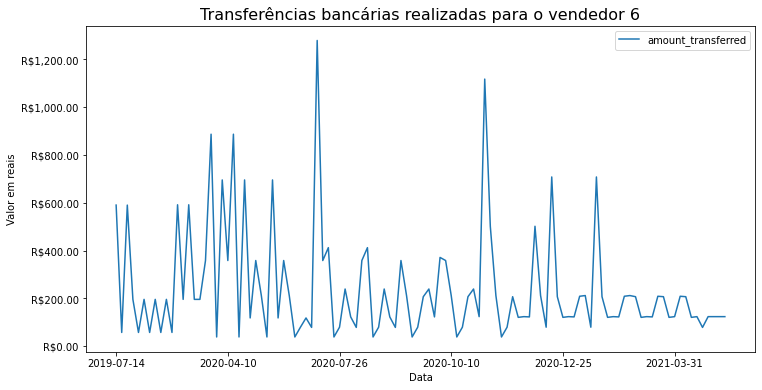

In [96]:
ax = transferencias_vendedor_6.plot(x='created_at', y='amount_transferred', figsize=(12,6))
plt.title('Transferências bancárias realizadas para o vendedor 6', fontsize = 16)
plt.xlabel('Data')
plt.ylabel('Valor em reais')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

plt.show()

Vamos calcular agora o valor total transferido:

In [44]:
transferencias_vendedor_6['amount_transferred'].sum()

26546.290000000005

Bom, o valor de lucro totl que foi calculado acima, foi de 26.670, 34 reais e o valor total de transferência foi de 26.546,29 reais.

A conta não fecha. 

Duas hipóteses para o ocorrido: 

1° Olhando na tabela, a coluna status possui dois valores: 'COMPLETED' e 'FAILED'.
Considerou-se todas as linhas para fazer o cálculo, porém se uma linha tiver o status 'FAILED', o cálculo está errado.
Resolver isso é fácil: basta extrair as linhas que possuem apenas o status 'COMPLETED'.

2° Talvez até o presente momento, simplesmente a quantia que falta para a conta fechar não está presente em conta ainda.

Vamos verificar a primeira hipótese:

In [99]:
completo = dados_bank_transfers.query("numero_vendedor == 6 and status == 'COMPLETED'")
total = completo['amount_transferred'].sum()
print('Valor transferido:', total)

Valor transferido: 26546.290000000005


O valor bate exatamente com o valor do primeiro cálculo, considerando-se a coluna status. Logo, todas as transferências realizadas foram completas, nenhuma falhou.

O valor que falta, associaremos à hipótese 2.



Para finzalizar o relatório, vamos fazer uma análise rápida do vendedor que obteve menor lucro:

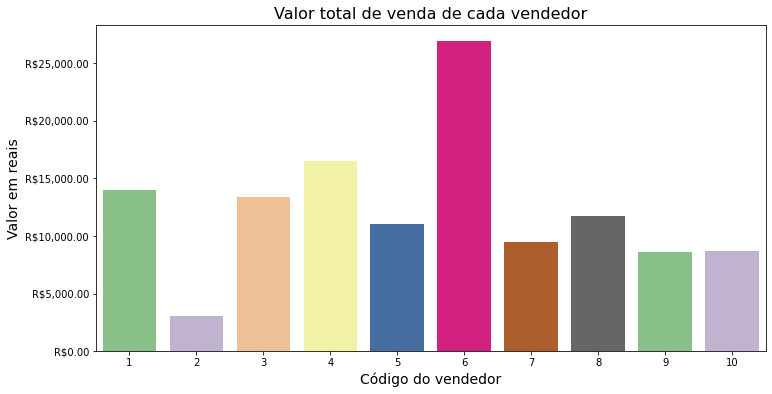

In [101]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = venda_total_por_vendedor.index, y='amount_paid', data=venda_total_por_vendedor, palette='Accent')
ax.set_title('Valor total de venda de cada vendedor', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
ax.set_xlabel('Código do vendedor', fontsize=14 )
ax.set_ylabel('Valor em reais', fontsize=14)
plt.show()

Observando o gráfico, podemos observar que o vendedor que obteve menor lucro foi o 2.

Vejamos o lucro desse vendedor:

In [106]:
venda_total_por_vendedor.loc[2]

amount_paid        3103.50
marketplace_fee      31.05
Name: 2, dtype: float64

O lucro total desse vendedor descontando a taxa, foi de R$ 3.072,45 reais.

Vamos ver a distribuição gráfica do seu lucro:

In [111]:
vendedor_2 = dados_payments[dados_payments['numero_vendedor'] == 2]

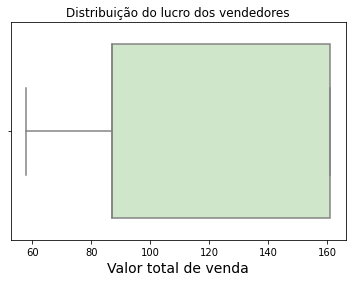

In [117]:
ax = sns.boxplot(data = vendedor_2, x='amount_paid', color = '#ccebc5' )
ax.set_xlabel('Valor total de venda', fontsize=14 )
ax.set_title('Distribuição do lucro dos vendedores')
plt.show()

Percebe-se que o menor valor de venda do vendedor 2 foi de 60,00 reais, e seu valor máximo de 160,00.

# Conclusão

Finalizando esse relatório, passamos por alguns pontos importantes, conhecemos de onde são os vendedores, de onde são os clientes, vimos os vendedores que mais venderam em produtos, assim como vendedores que mais venderam em reais.

À organização, fica a sugestão de conhecer mais o vendedor 2 (id = 5f50e19a836e1cd15acb2fd7) e tentar descobrir o porque de pouco lucro. Talvez investir mais em treinamentos, em marketing.
Com relação ao vendedor 6 (id = 5f50e19a299538c596304d31), parabenizá-lo pelo seu excelente desempenho. Continuar estimulando o vendedor através de cursos e treinamentos para que esse desempenho seja mantido e/ou aumentado.

**Obs**.: Para a análise, parte-se do pressuposto que todos os vendedores estejam vendendo a mesma coisa, como livros, sapatos, roupas, por exemplo, em vários dias. Essa hipótese foi criada para auxiliar nas análises e ajudar nas devidas comparações. 

Sabemos que o vendedor 6 vendeu mais em reais porém menos em produtos. Pois vendeu num dia mais que o vendedor 2 (que vendeu mais em produtos e menos em reais). Então, a análise é diária. Por mais que o vendedor 2 tenha vendido mais produtos ao logo de todos os dias, num mesmo dia, provavelmente, o vendedor 6 vendeu mais livros, por exemplo, vendendo assim, mais em reais e tendo um lucro maior.


Espero que esse relatório seja útil e as análises satisfatórias.

Leonardo Guimarães.